## Libraries

In [1]:
import pandas as pd
import numpy as np

# preprocessing
from sklearn.model_selection import train_test_split

## Load Data


In [2]:
from src.load_data import load_data

file_path='../data/raw/flight_df (2).csv'

df = load_data(file_path)

# Select specified columns for app
selected_columns = [ 
    'Inflight wifi service',
    'Online boarding',
    'Age',
    'Flight Distance',
    'Baggage handling',
    'Checkin service',
    'Loyal Customer',
    'Seat comfort',
    'Business Travel',
    'Inflight entertainment',
    'satisfied'
]

# Filter the DataFrame to include only the selected columns
df = df[selected_columns]
df.head()

,Inflight wifi service,Online boarding,Age,Flight Distance,Baggage handling,Checkin service,Loyal Customer,Seat comfort,Business Travel,Inflight entertainment,satisfied
0,2,2,26,2062,3,3,1,2,1,2,0
1,5,4,52,680,4,4,1,4,1,4,1
2,3,3,28,188,4,4,1,3,0,3,0
3,3,4,54,453,3,4,1,4,1,3,0
4,4,4,40,775,3,3,1,4,1,4,0


## Model Validation

In [3]:
#define target
y=df['satisfied']
X=df.drop(columns='satisfied')

In [4]:
# save x new dataset for the app
new_dataset = X.to_csv('../data/transformed/_new_flight_df.csv', index=False)

In [5]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessing and Pipeline

In [6]:
from src.preprocessing_pipeline import create_preprocessing_pipeline

preprocessor = create_preprocessing_pipeline()

In [7]:
from src.data_preprocessing import preprocess_and_rebalance_data

X_train_balanced, X_test_transformed, y_train_balanced = preprocess_and_rebalance_data(preprocessor, X_train, X_test, y_train)

#convert the preproessed data back into a dataframe

X_train_balanced_df = pd.DataFrame(X_train_balanced)
X_test_transformed_df = pd.DataFrame(X_test_transformed)

## Machine Learning

In [8]:
import lightgbm as lgb
from src.train_predict import train_and_predict_model

lgbm_model = lgb.LGBMClassifier(random_state=42, verbose=-1)

# Train the model on the preprocessed data and predict the target variable for the test set
train_preds, test_preds = train_and_predict_model(X_train_balanced_df, y_train_balanced, X_test_transformed_df, preprocessor, lgbm_model)

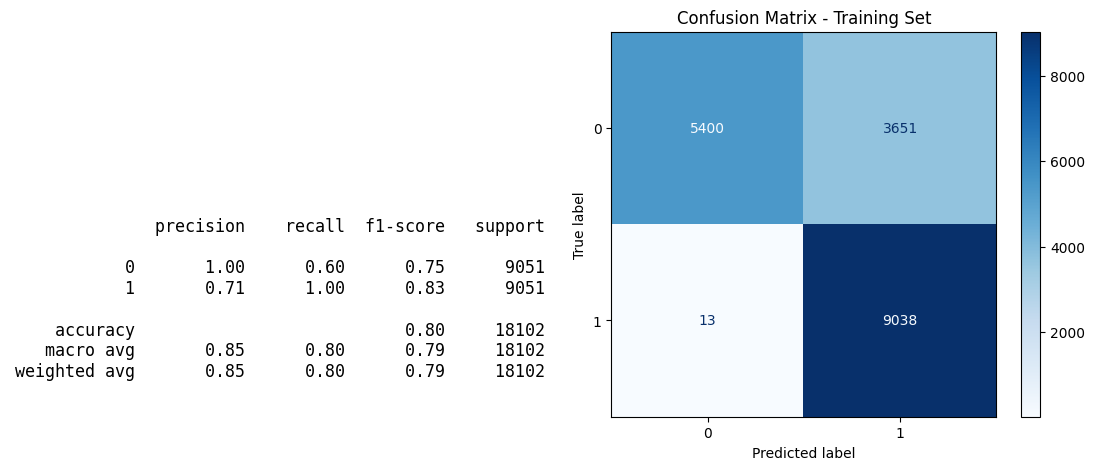

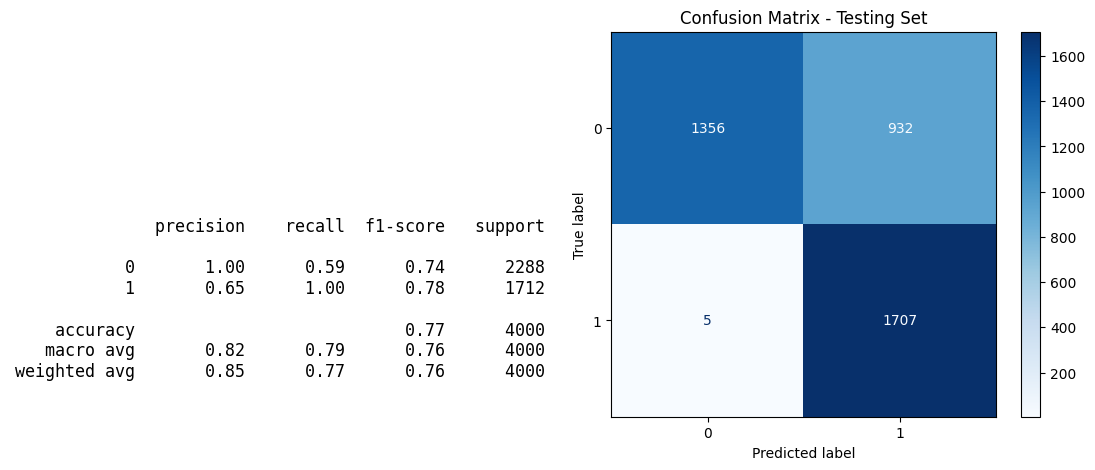

Model Saved to ../models/lgbm_model.joblib


In [9]:
from src.evaluate_model import evaluate_models, save_model

train_report, test_report = evaluate_models(lgbm_model, X_train_balanced_df, y_train_balanced, X_test_transformed_df, y_test)

#save the trained model to the models folder
model_path = '../models/lgbm_model.joblib'
save_model(lgbm_model, model_path)

In [10]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

# Train the model on the preprocessed data and predict the target variable for the test set
train_preds, test_preds = train_and_predict_model(X_train_balanced_df, y_train_balanced, X_test_transformed_df, preprocessor, dec_tree)

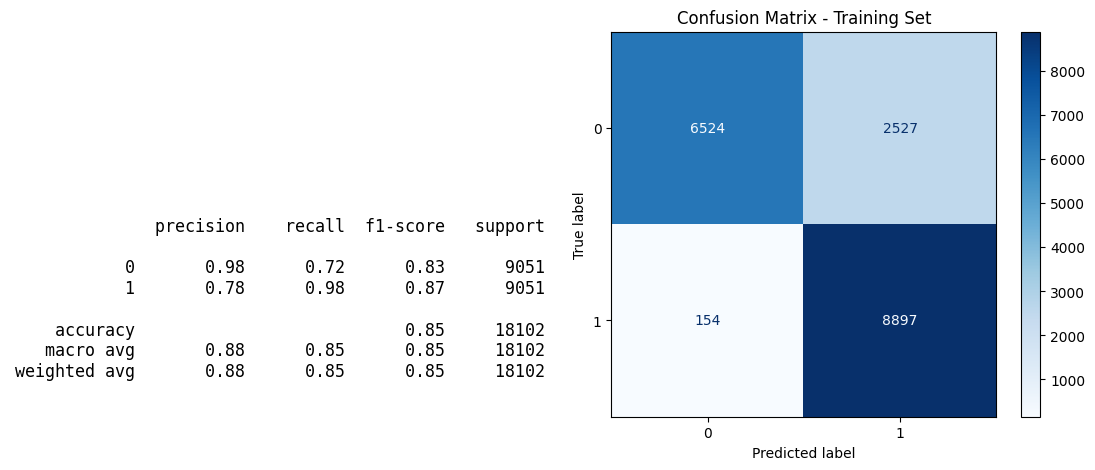

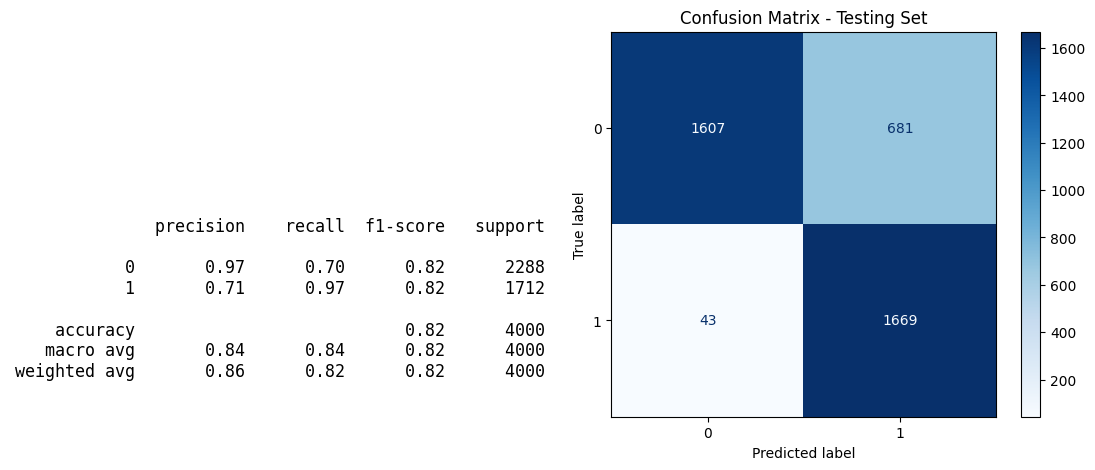

Model Saved to ../models/dec_tree.joblib


In [11]:
train_report, test_report = evaluate_models(dec_tree, X_train_balanced_df, y_train_balanced, X_test_transformed_df, y_test)

#save the trained model to the models folder
model_path = '../models/dec_tree.joblib'
save_model(dec_tree, model_path)

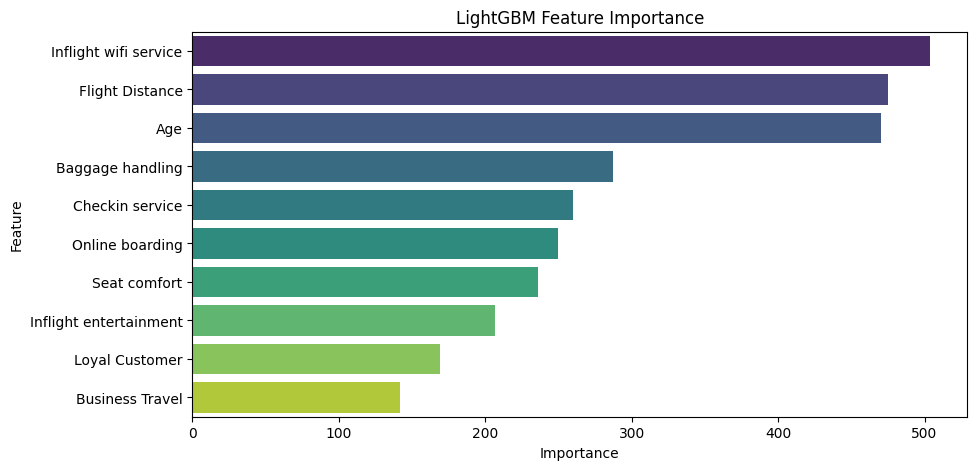

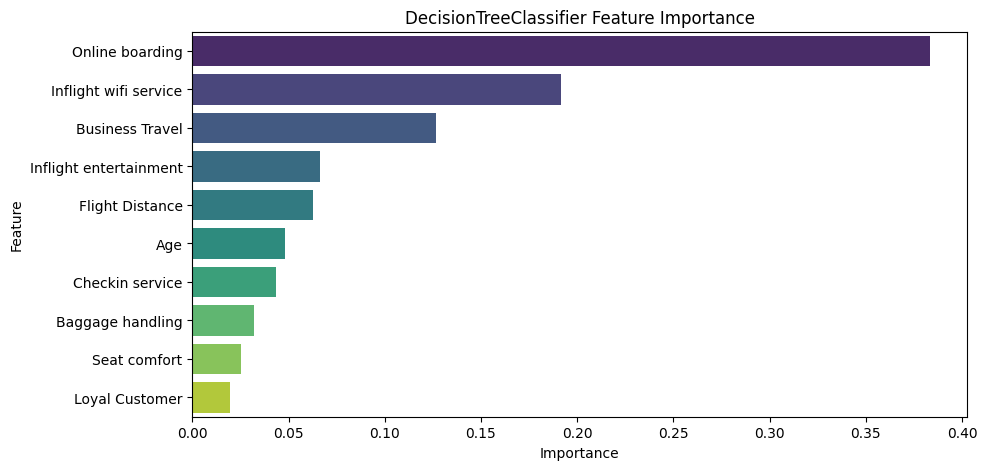

In [12]:
from src.feature_importance import train_model, get_feature_importance, plot_feature_importance
# Get feature names
feature_names = X_train.columns
# Train LGBM model
trained_lgbm_model = train_model(lgbm_model, X_train_balanced, y_train_balanced)
# Get and plot the feature importance of the trained LGBM model
lgbm_feature_importance = get_feature_importance(trained_lgbm_model, feature_names)
plot_feature_importance(lgbm_feature_importance, 'LightGBM Feature Importance')
# Train DecisionTreeClassifier model
trained_dec_tree = train_model(dec_tree, X_train_balanced, y_train_balanced)
# Get and plot the feature importance of the trained DecisionTreeClassifier model
dec_tree_feature_importance = get_feature_importance(trained_dec_tree, feature_names)
plot_feature_importance(dec_tree_feature_importance, 'DecisionTreeClassifier Feature Importance')

### Summary and Comparison of Feature Importance

The feature importance comparison between the Decision Tree and LightGBM models highlights the key factors influencing customer satisfaction. Both models show some common important features but differ in their rankings.

#### Decision Tree Feature Importance:
1. **Online boarding** is the most significant feature.
   - Indicates that the convenience and efficiency of the online boarding process are crucial for customer satisfaction.
2. **Inflight wifi service** and **Business Travel** are also highly important.
   - These factors significantly impact customer experience and satisfaction.
3. **Inflight entertainment**, **Flight Distance**, and **Age** have moderate importance.
   - These features contribute to satisfaction but are not as critical as the top features.
4. **Checkin service**, **Baggage handling**, **Seat comfort**, and **Loyal Customer** have lower importance.
   - These features are less influential in the model's predictions.

#### LightGBM Feature Importance:
1. **Inflight wifi service** is the most critical feature.
   - Significantly impacts customer satisfaction, similar to the Decision Tree model.
2. **Flight Distance** and **Age** rank very high.
   - Indicates the importance of flight length and passenger demographics in influencing satisfaction.
3. **Baggage handling**, **Checkin service**, and **Online boarding** show moderate importance.
   - Efficient baggage handling, check-in, and online boarding processes are essential for a positive customer experience.
4. **Seat comfort**, **Inflight entertainment**, **Loyal Customer**, and **Business Travel** have lower but notable importance.
   - These features also play roles in customer satisfaction, though to a lesser extent.

### Comparison:

- **Inflight wifi service** is highly important in both models, indicating its crucial role in customer satisfaction.
- **Online boarding** is the most significant feature in the Decision Tree model but has moderate importance in the LightGBM model.
- **Flight Distance** and **Age** are highly ranked in the LightGBM model but moderately important in the Decision Tree model.
- Both models agree on the importance of features like **Baggage handling**, **Checkin service**, **Seat comfort**, and **Loyal Customer**, though their rankings differ.
- **Business Travel** is highly important in the Decision Tree model but less so in the LightGBM model.

### Feature importance 